<a href="https://colab.research.google.com/github/baesumin/DeepLearning/blob/main/Machine%20learning%20competition%202020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving MyTrainset.csv to MyTrainset.csv


In [2]:
import pandas as pd
import numpy as np
import io
MyTrainset = pd.read_csv(io.StringIO(uploaded['MyTrainset.csv'].decode('utf-8')))

In [3]:
MyTrainset

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af
0,HI,188,128,95,114,143,108,88,103,113,85,88,113,87,88,103,87,84,99,104,82,96,100,78,70,79,84,66,70,75,76,63
1,PH,174,112,88,104,119,92,74,79,88,74,67,90,68,71,73,68,71,77,90,67,71,82,65,70,75,89,73,67,71,89,73
2,GR,175,138,106,105,135,109,75,95,113,96,74,112,96,70,87,100,66,83,117,67,88,110,98,67,88,119,98,75,91,110,94
3,PH,176,111,80,106,131,96,76,99,104,85,75,89,75,79,91,75,84,103,109,82,91,96,78,78,91,96,78,82,104,112,85
4,EL,182,144,111,100,151,119,67,106,114,90,76,115,94,68,106,91,68,102,115,71,95,108,88,71,103,113,92,68,107,118,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,EL,153,120,95,83,123,104,53,83,100,85,51,100,79,51,75,79,51,72,89,49,75,100,78,52,67,84,78,52,71,84,78
4276,PH,179,110,82,109,135,97,83,95,97,75,78,93,73,82,92,76,78,88,85,76,85,86,68,80,94,94,76,80,89,94,72
4277,EL,171,138,106,106,152,122,76,112,122,99,79,118,96,84,116,96,75,107,123,66,96,112,92,70,100,117,92,66,109,122,92
4278,PH,175,109,81,105,123,81,71,79,85,67,78,88,70,74,87,66,78,87,84,75,84,90,68,75,88,97,75,75,88,97,72


In [4]:
df_x = MyTrainset.loc[:,MyTrainset.columns != 'a']
df_y = MyTrainset.loc[:,'a']

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
test = SelectKBest(score_func=chi2, k=df_x.shape[1])
fit= test.fit(df_x,df_y)

In [7]:
f_order= np.argsort(-fit.scores_)
sorted_columns= df_x.columns[f_order]

In [7]:
print(sorted_columns)

Index(['p', 's', 'z', 'ad', 'i', 'v', 'q', 'f', 'n', 'ab', 'x', 'k', 'af', 'd',
       'o', 'r', 'l', 'y', 'ac', 'u', 'h', 't', 'm', 'g', 'aa', 'j', 'w', 'ae',
       'e', 'c', 'b'],
      dtype='object')


In [ ]:
model = LGBMClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=1,max_features='sqrt',max_depth=50,bootstrap='false')
for i in range(1, df_x.shape[1]+1):
  fs = sorted_columns[0:i]
  df_x_selected= df_x[fs]
  scores = cross_val_score(model, df_x_selected, df_y, cv=5)
  print(fs.tolist())
  print(np.round(scores.mean(), 4))

In [8]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier #
from xgboost import XGBClassifier #
from sklearn.model_selection import StratifiedKFold #
from sklearn.svm import SVC

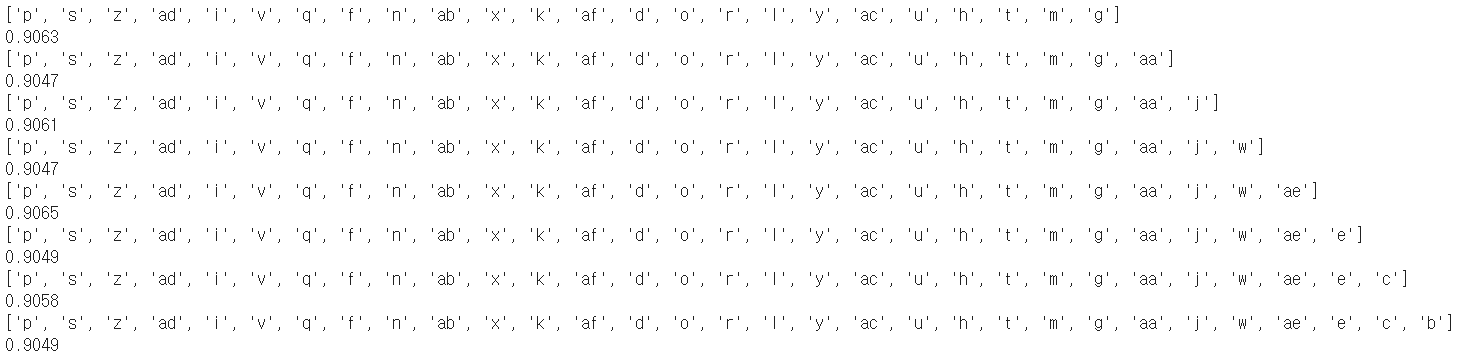

In [ ]:
results = []
names = []
scoring = 'accuracy'
models = []
#models.append(('RF', RandomForestClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split=3,max_features='auto',max_depth=40,bootstrap='false')))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB',XGBClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
for name, model in models:
  kfold= model_selection.KFold(n_splits=10, shuffle=True)
  cv_results= model_selection.cross_val_score(model, df_x, df_y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
  print(msg)

LGBM: 0.915187 (0.007823)
XGB: 0.895093 (0.015479)
GBC: 0.901636 (0.017024)


In [16]:
from sklearn.metrics import accuracy_score

In [ ]:
vot = VotingClassifier(estimators=[('rf',RandomForestClassifier(n_estimators=1000,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=50,bootstrap='false')),('lgbm',LGBMClassifier(n_estimators=1000,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=50,bootstrap='false')),('xgb',XGBClassifier(n_estimators=1000,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=50,bootstrap='false')),('GBC',GradientBoostingClassifier())],voting='soft')

In [ ]:
vot.fit(train_x,train_y)
votPred_y = vot.predict(test_x)
print(accuracy_score(test_y,votPred_y))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_x_scale = df_x

In [ ]:
df_x_scale

,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af
0,188,128,95,114,143,108,88,103,113,85,88,113,87,88,103,87,84,99,104,82,96,100,78,70,79,84,66,70,75,76,63
1,174,112,88,104,119,92,74,79,88,74,67,90,68,71,73,68,71,77,90,67,71,82,65,70,75,89,73,67,71,89,73
2,175,138,106,105,135,109,75,95,113,96,74,112,96,70,87,100,66,83,117,67,88,110,98,67,88,119,98,75,91,110,94
3,176,111,80,106,131,96,76,99,104,85,75,89,75,79,91,75,84,103,109,82,91,96,78,78,91,96,78,82,104,112,85
4,182,144,111,100,151,119,67,106,114,90,76,115,94,68,106,91,68,102,115,71,95,108,88,71,103,113,92,68,107,118,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,153,120,95,83,123,104,53,83,100,85,51,100,79,51,75,79,51,72,89,49,75,100,78,52,67,84,78,52,71,84,78
4276,179,110,82,109,135,97,83,95,97,75,78,93,73,82,92,76,78,88,85,76,85,86,68,80,94,94,76,80,89,94,72
4277,171,138,106,106,152,122,76,112,122,99,79,118,96,84,116,96,75,107,123,66,96,112,92,70,100,117,92,66,109,122,92
4278,175,109,81,105,123,81,71,79,85,67,78,88,70,74,87,66,78,87,84,75,84,90,68,75,88,97,75,75,88,97,72


In [ ]:
scaler = StandardScaler()
scaler.fit(df_x_scale) # X : input data
x_scaled = scaler.transform(df_x_scale)

In [ ]:
print(x_scaled)

[[ 1.37622888  0.52991591  0.12809573 ... -0.33685619 -1.38622804
  -1.02600162]
 [ 0.34817065 -0.4380135  -0.24385117 ... -0.51106408 -0.60431234
  -0.50532447]
 [ 0.42160339  1.13487179  0.71258371 ...  0.35997537  0.65878224
   0.58809754]
 ...
 [ 0.12787246  1.13487179  0.71258371 ...  1.14391087  1.38055058
   0.48396211]
 [ 0.42160339 -0.61950026 -0.61579806 ...  0.22931945 -0.12313345
  -0.55739219]
 [ 0.78876704  1.37685414  0.71258371 ... -0.51106408  0.05730863
   0.11948811]]


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pprint as pp

In [18]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3) 

In [ ]:
base_model = LGBMClassifier()
base_model.fit(train_x, train_y)
base_accuracy = base_model.score(test_x, test_y)
print(base_accuracy)

0.9096573208722741


In [ ]:
base_model = XGBClassifier()
base_model.fit(train_x, train_y)
base_accuracy = base_model.score(test_x, test_y)
print(base_accuracy)

In [ ]:
# Number of trees in random forest
n_estimators = [311] #[int(x) for x in np.linspace(start = 300, stop = 350, num = 1)]
# Number of features to consider at every split
max_features = 'sqrt' #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 500, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1] #[1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1] #[1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [False] #[True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = LGBMClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 44 is smaller than n_iter=100. Running 44 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 220 out of 220 | elapsed:  6.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                            subsample_for_bin=200000,
                                            subsample_f

In [ ]:
pp.pprint(rf_random.best_params_)

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 's',
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 311}


In [ ]:
best_random_model = rf_random.best_estimator_
best_random_accuracy = best_random_model.score(test_x, test_y)
print('base acc: {0:0.2f}. best acc : {1:0.2f}'.format( \
base_accuracy, best_random_accuracy))
print('Improvement of {:0.2f}%.'.format( 100 * \
(best_random_accuracy - base_accuracy) / base_accuracy))

base acc: 0.91. best acc : 0.91
Improvement of 0.34%.


In [ ]:
rf_pred = 0
LGBM_pred = 0
XGB_pred = 0
GBC_pred = 0

In [43]:
knn_pred = 0

In [71]:
#model = RandomForestClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50)
#model = LGBMClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50)
model = XGBClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50)
#model = GradientBoostingClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50)
model = KNeighborsClassifier()
model.fit(best_train_x, best_train_y)
pred_y = model.predict(testset)
#print(pred_y)
#print(len(pred_y))
#print(accuracy_score(best_test_y,pred_y))
XGB_pred = pred_y

In [72]:
pred = np.array([rf_pred,LGBM_pred,XGB_pred,GBC_pred,knn_pred])

In [73]:
pred = np.transpose(pred)

In [78]:
pred_final = LGBM_pred
pred_final

array(['HI', 'EL', 'HI', ..., 'PH', 'PH', 'CO'], dtype=object)

In [74]:
pred

array([['HI', 'HI', 'HI', 'HI', 'HI'],
       ['EL', 'EL', 'EL', 'EL', 'EL'],
       ['HI', 'HI', 'HI', 'HI', 'HI'],
       ...,
       ['PH', 'PH', 'PH', 'PH', 'PH'],
       ['PH', 'PH', 'PH', 'PH', 'PH'],
       ['CO', 'CO', 'HI', 'HI', 'HI']], dtype=object)

In [90]:
tmp = {}
tmp['hi'] = 1
if tmp['hi'] is not None:
  print('hi2')
pred[i][j]

hi2


'HI'

In [98]:
for i in range(0,len(pred)):
  tmp = {}
  for j in range(0,5):
    if pred[i][j] in tmp:
      tmp[pred[i][j]] += 1
    else:
      tmp[pred[i][j]] = 1
  for k in tmp.keys():
    if(tmp[k]>=3):
      pred_final[i] = k

In [99]:
pred_final

array(['HI', 'EL', 'HI', ..., 'PH', 'PH', 'HI'], dtype=object)

In [100]:
pred_final.shape

(1833,)

In [26]:
lr_final = LogisticRegression()

In [31]:
lr_final.fit(pred, test_y)

ValueError: ignored

In [ ]:
vot = VotingClassifier(estimators=[('rf',RandomForestClassifier()),
                                   ('lgbm',LGBMClassifier(random_state=0)),
                                   ('lgbm2',LGBMClassifier(random_state=42)),
                                   ('lgbm3',LGBMClassifier(random_state=1234)),
                                   ('xgb',XGBClassifier()),
                                   ('Knn',KNeighborsClassifier()),
                                   ('Gr',GradientBoostingClassifier()),
                                   ('DT',DecisionTreeClassifier()),
                                   ('svc',SVC())],voting='hard')

In [10]:
from sklearn.model_selection import KFold

In [57]:
kf = KFold(n_splits=55,shuffle=True)

In [54]:
model = LGBMClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50)

In [58]:
i = 0
acc = np.zeros(55)
best_train_x = []
best_test_x = []
best_train_y = []
best_test_y = []
max = 0
for train_index, test_index in kf.split(df_x):
    #print("fold:", i)
    train_x, test_x = df_x.iloc[train_index,:], df_x.iloc[test_index,:]
    #train_x, test_x = x_scaled[train_index,:], x_scaled[test_index,:]   
    train_y, test_y = df_y[train_index], df_y[test_index]
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    acc[i] = accuracy_score(test_y, pred_y)
    print(acc[i])
    if max<acc[i]:
      max = acc[i]
      best_train_x = train_x
      best_test_x = test_x
      best_train_y = train_y
      best_test_y = test_y
    i+=1
print("10 fold :", acc)
print("mean accuracy :", np.mean(acc))
print(max)

0.9102564102564102
0.9230769230769231
0.8846153846153846
0.8846153846153846
0.9487179487179487
0.8589743589743589
0.9487179487179487
0.9102564102564102
0.8846153846153846
0.9102564102564102
0.9358974358974359
0.8461538461538461
0.9358974358974359
0.9102564102564102
0.9358974358974359
0.9358974358974359
0.9230769230769231
0.8974358974358975
0.9102564102564102
0.9102564102564102
0.9487179487179487
0.8974358974358975
0.9230769230769231
0.8974358974358975
0.9102564102564102
0.9615384615384616
0.9358974358974359
0.9230769230769231
0.9102564102564102
0.9358974358974359
0.8974358974358975
0.9487179487179487
0.9102564102564102
0.9358974358974359
0.9102564102564102
0.9102564102564102
0.9102564102564102
0.9358974358974359
0.9487179487179487
0.9358974358974359
0.9230769230769231
0.8974358974358975
0.8717948717948718
0.8846153846153846
0.9358974358974359
0.8961038961038961
0.935064935064935
0.935064935064935
0.974025974025974
0.8961038961038961
0.9090909090909091
0.8831168831168831
0.9220779220779

In [ ]:
model.fit(best_train_x, best_train_y)
pred_y = model.predict(best_test_x)
print(pred_y)
print(len(pred_y))
print(accuracy_score(best_test_y,pred_y))

In [ ]:
model = LGBMClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=1,max_features='sqrt',max_depth=50,bootstrap='false')
model.fit(best_train_x, best_train_y)
pred_y = model.predict(best_test_x)
print(pred_y)
print(len(pred_y))
print(accuracy_score(best_test_y,pred_y))

['HI' 'MI' 'EL' 'HI' 'HI' 'PH' 'HI' 'GR' 'MI' 'EL' 'MI' 'PH' 'PH' 'CO'
 'PH' 'CO' 'PH' 'EL' 'HI' 'HI' 'EL' 'MI' 'GR' 'HI' 'PH' 'GR' 'HI' 'EL'
 'PH' 'GR' 'MI' 'EL' 'GR' 'CO' 'EL' 'GR' 'EL' 'EL' 'CO' 'GR' 'EL' 'GR'
 'PH' 'HI' 'GR' 'MI' 'HI' 'EL' 'CO' 'PH' 'HI' 'PH' 'HI' 'EL' 'HI' 'EL'
 'EL' 'GR' 'HI' 'CO' 'EL' 'EL' 'HI' 'MI' 'HI' 'PH' 'CO' 'EL' 'CO' 'CO'
 'EL']
71
0.971830985915493


In [ ]:
vot.fit(train_x, train_y)
pred_y = model.predict(test_x)
print(pred_y)
print(accuracy_score(test_y,pred_y))

In [33]:
uploaded = files.upload()

Saving testset.csv to testset.csv


In [34]:
testset = pd.read_csv(io.StringIO(uploaded['testset.csv'].decode('utf-8')))

In [ ]:
testset

In [50]:
#model = LGBMClassifier(n_estimators=311,min_samples_leaf=1,min_samples_split=2,max_features='sqrt',max_depth=50,bootstrap='false')
#model = LGBMClassifier(n_estimators=1000,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=50,bootstrap='false')
#model = XGBClassifier(n_estimators=1000,min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=50,bootstrap='false')
#model.fit(best_train_x, best_train_y)
pred_y = model.predict(testset)
#pred_y = model.predict_proba(testset)
print(pred_y)
print(pred_y.shape)


['HI' 'EL' 'HI' ... 'PH' 'PH' 'HI']
(1833,)


In [ ]:
a = pd.DataFrame(pred_y)
a.to_csv("32152076_배수민.csv", index = False, header = False)

In [101]:
import xlwt, xlrd

In [102]:
file_name = '32152076_배수민.xls'

In [103]:
wb = xlwt.Workbook()

In [104]:
ws_1 = wb.add_sheet('sheet0',cell_overwrite_ok=False)

In [105]:
ws_1 = wb.get_sheet(0)

In [106]:
idx = 0

In [107]:
#ws_1.write(0,0,'a')
for i in range(0,len(pred_final)):
  ws_1.write(idx,0,pred_final[i])
  idx+=1

In [108]:
wb.save(file_name)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(len(testset))
print(len(pred_y))

1833
1833
